# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [1]:
from scipy import stats;
import pandas as pd;
import numpy as np;
import matplotlib.pyplot as plt

# Challenge 1 - Generate and Plot Normal Distributions

#### Step 1: Generate samples and test normal distribution

Use mean = 50, standard_deviation = 5 and sample_size=[10, 50, 500, 5000] to generate 4 random samples that are normally distributed. Test your normal distributions with [`scipy.stats.normaltest`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html).


*Hint: Read the documentation for `scipy.stats.normaltest`. The function does not simply return Yes or No for whether your data is normal distribution. It returns the likelihood.*

In [23]:
# Variables
mu = 50;
sigma = 5;
sample_size = [10, 50, 500, 5000]

# Distributions & Tests
dists = [np.random.normal(mu, sigma, size) for size in sample_size]
tests = [stats.normaltest(dist) for dist in dists]

# Show tests
tests

[NormaltestResult(statistic=4.711169421165496, pvalue=0.09483803751535987),
 NormaltestResult(statistic=4.105875603749451, pvalue=0.1283572609379531),
 NormaltestResult(statistic=1.6768332555562613, pvalue=0.43239462332923173),
 NormaltestResult(statistic=1.2296285397343218, pvalue=0.5407413179400862)]

#### Interpret the normaltest results and make your observations.

`Comments:`

The null hypothesis is that a sample comes from a normal distribution.

No podemos rechazar la hipotesis nula, ergo todas las muestras tiene distribución normal.

The p value tends to increase with the the observations.

#### Step 2: Plot normal distributions

Use matplotlib subplots to plot a histogram of each sample. 

*Hints:*
- Use subplots to compare your figures side by side.

- Your output should look like below:

![normal distributions with different sample sizes](images/ch-1.png)

In [ ]:
plt.subplot(222)
sns.histplot(dists[1])

plt.subplot(223)
sns.histplot(dists[2])

plt.subplot(224)
sns.histplot(dists[3])

<AxesSubplot:title={'center':'Size 5000'}, xlabel='Samples', ylabel='Frecuency'>

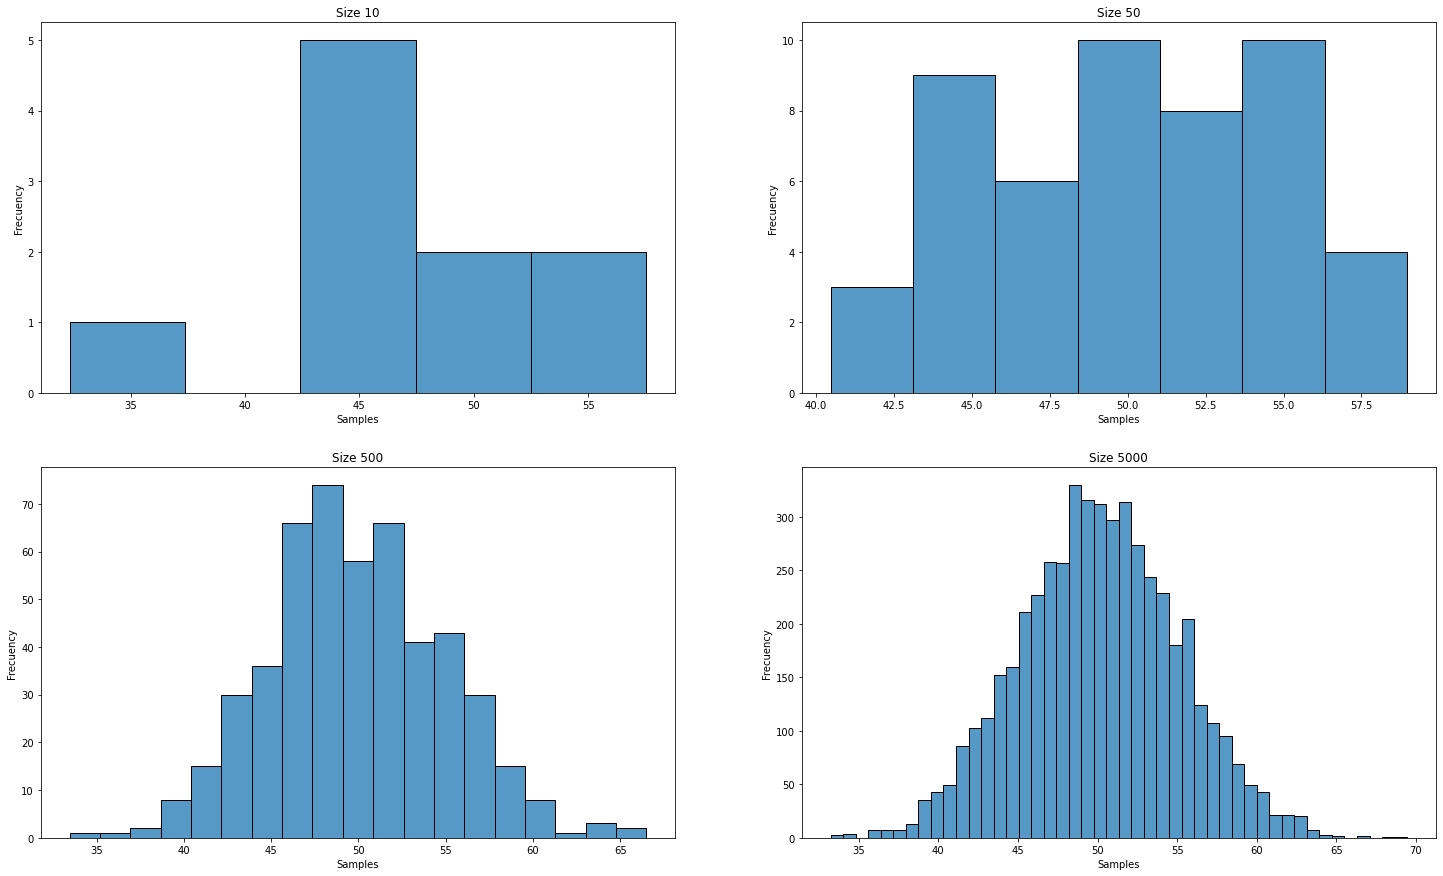

In [66]:
import seaborn as sns

# Create figure and axes

fig, axs = plt.subplots(2,2, figsize= (25,15) )

# Plot each histogram
axs[0][0].set_title('Size 10')
axs[0][0].set_ylabel('Frecuency')
axs[0][0].set_xlabel('Samples')
sns.histplot(ax=axs[0][0], x = dists[0])

axs[0][1].set_title('Size 50')
axs[0][1].set_ylabel('Frecuency')
axs[0][1].set_xlabel('Samples')
sns.histplot(ax=axs[0][1], x = dists[1])

axs[1][0].set_title('Size 500')
axs[1][0].set_ylabel('Frecuency')
axs[1][0].set_xlabel('Samples')
sns.histplot(ax=axs[1][0], x = dists[2])

axs[1][1].set_title('Size 5000')
axs[1][1].set_ylabel('Frecuency')
axs[1][1].set_xlabel('Samples')
sns.histplot(ax=axs[1][1], x = dists[3])

#### Compare the distributions above. What do you observe? Explain with the Central Limit Theorem.

`Comments:`

The more samples we have the clearer is the normal distribution.

# Challenge 2 - Plot Probability Mass Function (PMF)

#### Background knowledge

[PMF](https://en.wikipedia.org/wiki/Probability_mass_function) shows the probability distribution of a **discrete random variable**. A [discrete random variable](https://en.wikipedia.org/wiki/Random_variable#Discrete_random_variable) has random numeric values that are not continuous. For example, the number of people in a household can only be integers but not floats. Therefore the number of people in a household is a discrete variable.

#### Question: We assume that the probability of clicking an Ad in a Youtube video is 0.15. We have a sample of 5 people who watched the video and we want to plot the PMF for a binomial distribution.

*Hint: use binom from `scipy.stats.binom`. Your output should look like below:*

![binom 10](images/ch-2.png)

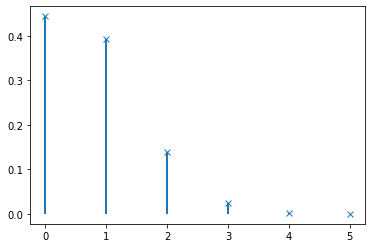

In [74]:
from scipy.stats import binom

# Variables 
n = 5
p = 0.15

# Binomial distribution
binomial = binom(n,p)

# Plot line + bullet point -> Discrete Distribution Representation
plt.plot()
x = range(n+1)
plt.plot(x, binomial.pmf(x), 'x')
plt.vlines(x,0, binomial.pmf(x), lw = 2)

#### Explain what you observe from the plot above.

`Comments:`

The probability of more than one people seeing the add reduces with the size.

#### Now plot PMP with 50, 500, and 5000 visitors.

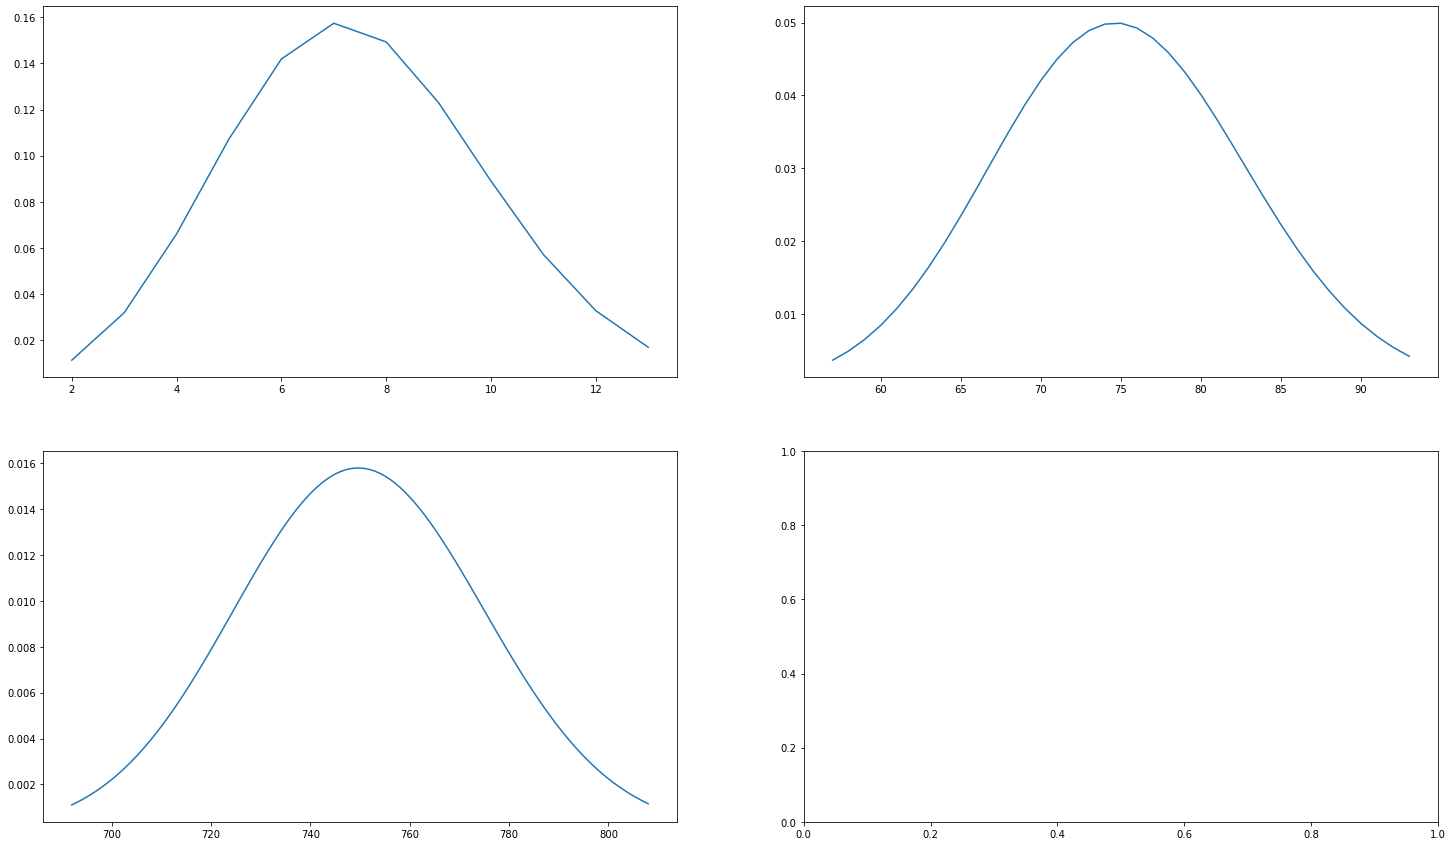

In [92]:
# Create figure and axes
fig, axs = plt.subplots(2,2, figsize= (25,15))

# Variables
n1 = 50
n2 = 500
n3 = 5000
p = 0.15
# Plot each PMF


plt.subplot(221)
x = np.arange(binom(n1,p).ppf(0.01), binom(n1,p).ppf(0.99))
plt.plot( x, binom(n1,p).pmf(x), '-')

plt.subplot(222)
x = np.arange(binom(n2,p).ppf(0.01), binom(n2,p).ppf(0.99))
plt.plot( x, binom(n2,p).pmf(x), '-')

plt.subplot(223)
x = np.arange(binom(n3,p).ppf(0.01), binom(n3,p).ppf(0.99))

plt.plot(x, binom(n3,p).pmf(x), '-')
# For visualization reasons, the next discrete distributions are represented using continuous lines

#### What did you notice from the distribution plots? Comment your findings.

`Comments:`

The higher the sample the smaller the probability axis.

# Challenge 3

#### Reaserch the Poisson distribution. Write about your own understanding of the Poisson distribution.

`Comments:`<br/>

Is a discrete probability distribution that expresses the probability of a given number of events occurring in a fixed interval of time or space if these events occur with a known constant mean rate and independently of the time since the last event


#### A website has an average of 300 visits per day. What is the probability of getting 320 visitors in a day?

*Hint: use `scipy.stats.poisson`*

In [102]:
from scipy.stats import poisson

# Variables
mu = 300
visits = 320

# Probability

poisson(mu).pmf(visits)

0.011612348610402475

#### What is the probability of getting 60 visits?

In [94]:
# Variables
visits = 60

# Probability
poisson(mu).pmf(visits)

2.622743762294515e-64

#### Plot the distribution of the probability for getting 0-1000 visits.

*Hints:* 

- Create a list to store the Poisson distribution probabilities for n=0 to 1000. Then plot the probabilities.

- Your plot should look like below:

![poisson distribution](images/ch-3.png)

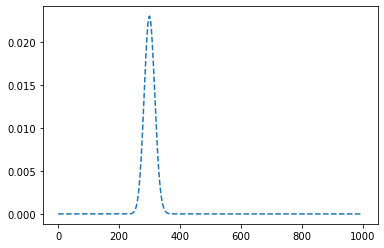

In [104]:
mu = 300 # parametro de forma
poisson = stats.poisson(mu) # Distribución
x = np.arange(0, 1000)
fmp = poisson.pmf(x) # Función de Masa de Probabilidad
plt.plot(x, fmp, '--')

# Challenge 4 - Central Limit Theorem
#### Example of application

A delivery company needs 35 minutes to deliver a package, with a standard deviation of 8 minutes. Suppose that in one day, they deliver 200 packages.

#### a. What is the probability that the mean delivery time today is between 30 and 35 minutes?

In [107]:
# Variables
m = 35
sd = 8

# Probability
distribution = stats.norm(loc= m, scale= sd)

distribution.cdf(35)- distribution.cdf(30)

0.23401447095129946

#### b. What is the probability that in total, it takes more than 115 hours to deliver all 200 packages?

In [115]:
import math
z = (time - m)/(sd/math.sqrt(200))
z

-0.8838834764831844

In [109]:
time

34.5

In [110]:
# Variables
m = 35
sd = 8
time = 115*60/200

# Probability

distribution.sf(time)

0.5249176690292472

# Challenge 5 - Normal Variables 

The value (in thousands) of the monthly sales of a publishing company follows a normal distribution with a mean equal to 200 and a standard deviation equal to 40. 

<div align="center">$X → N(200,40)$</div>

#### 1. Find the probability that the monthly sales are more than 300. 

In [117]:
# Variables
mu = 200
sigma = 40

# Probability
distribution = stats.norm(loc= mu, scale= sigma)

distribution.sf(300)

0.006209665325776132

#### 2. Find the probability that the monthly sales fall between 160 and 240.

In [119]:
# Probability

abs(distribution.cdf(160) - distribution.cdf(240))

0.6826894921370859

#### 3. Find the probability that the monthly sales do not exceed 150.

In [120]:
# Probability
distribution.cdf(150)

0.10564977366685535

#### 4. Find the probability that the monthly sales exceed 3000. 

In [121]:
# Probability
distribution.sf(3000)

0.0

# Challenge 6 - Poisson distribution
The mean number of violent robberies per month that are registered in a particular barrio is 4. Find the following probabilities.
#### 1.The probability that in a particular month there is no violent robbery.

In [122]:
# Variables
mu = 4

# Probability
distribution = stats.poisson(mu)

distribution.pmf(0)

0.01831563888873418

#### 2. The probability that there are at least 1 in a given month. 

In [131]:
# Probability
#Alternativa distribution.sf(0)

distribution.sf(1) + distribution.pmf(1)

0.9816843611112659

#### 3. The probability that there are between 2 and 6 (inclusive) in a given month.

In [132]:
# Probability
distribution.cdf(6) - distribution.cdf(1)

0.7977478271537555

#### 4. The probability that there more than two in 15 days.  

In [133]:
# Probability
mu = 4/2

distribution = stats.poisson(mu)

distribution.sf(2)

0.32332358381693654